<a href="https://colab.research.google.com/github/Suryavipparla/Bharath-Internship/blob/main/Bharath_Internship_Project_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Bharath Intern : Project 2**


# **Name**   : Vipparla Surya

# **Course** : Machine Learning

# **Studying** : CSE(AI&ML) 3rd year

# **Project** : House price predction

# **Title** **of** **the** **Report** :
# House price prediction



In [2]:
dataset_link = "/content/drive/MyDrive/House price data.csv"

In [3]:
import numpy as np
import pandas as pd
dataset = pd.read_csv(dataset_link)

In [4]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
dataset.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:

dataset = dataset.fillna(dataset.mean())


<ipython-input-7-cb698cd9323f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset = dataset.fillna(dataset.mean())


In [8]:
dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [9]:
x_data = dataset[[ 'bedrooms','bathrooms','sqft_living']]
y_data = dataset['price']

In [10]:
x_data.head()

,bedrooms,bathrooms,sqft_living
0,3.0,1.50,1340
1,5.0,2.50,3650
2,3.0,2.00,1930
3,3.0,2.25,2000
4,4.0,2.50,1940


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("shape of training samples:",x_train.shape)
print("shape of test samples :", x_test.shape)
print("shape of train labels :", y_train.shape)
print("shape of test labels:",y_test.shape)

shape of training samples: (3910, 3)
shape of test samples : (690, 3)
shape of train labels : (3910,)
shape of test labels: (690,)


In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

lre.fit(x_train,y_train)

LinearRegression()

In [13]:
print("Intercept is ",lre.intercept_,"\n","Coefficients are",lre.coef_)

Intercept is  120811.6314257487 
 Coefficients are [-52657.08805055  14542.51392979    271.69893737]


In [14]:
r_squared = lre.score(x_test, y_test)
print("R Square value is ",r_squared)

R Square value is  0.4450186747118554


In [15]:

y_pred = lre.predict(x_test)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 519669.74311355  740934.75112906  323398.09872973  669219.80950996
  586144.21273077  645840.12304823  268100.74419387  304070.01552715
  501839.68624012  358834.61142914  489937.43879564  318689.25234537
  359598.67174464  757885.09684618  212078.25729489  634972.16555328
  655673.79059366  529009.5799775   359444.09295144  547070.93853257
  502124.96302507  499122.69686638  656592.42970237  287922.65807793
  699184.54852586  427677.9848813   250919.09679512  270817.7335676
  610403.61034882  510715.78672445  439425.65353257  678367.27264466
  262666.76544639  330591.49978984  556943.53403038  472910.3701901
  271852.02351713  418492.72681056  669182.01457392  274569.01289087
  952783.19939221  384931.2872646   621387.21868459  580632.37807852
  518465.82721989  685791.97538641  528970.65202511  806026.84525796
  375746.02919386  665546.38609148  927450.58387224  592148.74504816
  460050.55568452  287081.874874    530807.93024253  529542.33861137
  268749.1536685

In [16]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("MSE is:", MSE)
print("RMSE is:", RMSE)
print("R_squared is:", r_squared)

MSE is: 75634500311.92892
RMSE is: 275017.2727519654
R_squared is: 0.4450186747118554


In [17]:
!pip install statsmodels --upgrade

# Implement Ridge Regression Model

In [18]:
x_data = dataset['sqft_living']
y_data = dataset['price']
x_data = np.array(x_data).reshape((-1,1))
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha=0.0)

ridge_model.fit(x_train, y_train)

y_pred = ridge_model.predict(x_test)

print("RSquared Error : ", ridge_model.score(x_test,y_test))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

RSquared Error :  0.4266186260766843
Mean Squared Error:  78142113488.84764


# LASSO Regression Model

In [20]:
from sklearn import datasets
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.2)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)


print("Model Score : ",lasso.score(x_test, y_test))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Model Score :  0.426618626055833
Mean Squared Error:  78142113491.68932


**For Multivariate model**

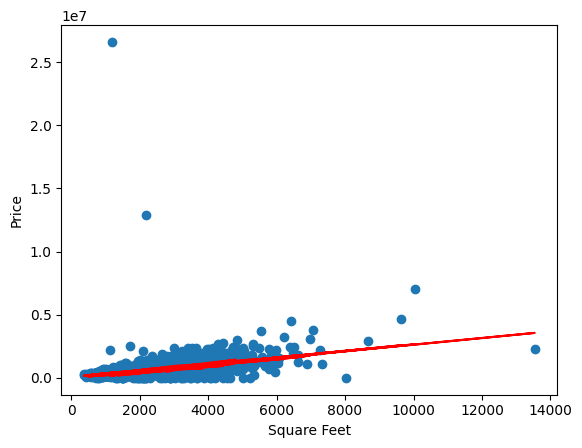

In [21]:
import numpy as np
import matplotlib.pyplot as plt

sqft = dataset['sqft_living']
bedrooms = dataset['bedrooms']
bathrooms = dataset['bathrooms']

price = dataset['price']

X = np.column_stack((sqft, bedrooms, bathrooms))

X = np.hstack((np.ones((len(X), 1)), X))

w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(price)

y_pred = X.dot(w)

fig, ax = plt.subplots()
ax.scatter(sqft, price)
ax.plot(sqft, y_pred, color='red')
ax.set_xlabel('Square Feet')
ax.set_ylabel('Price')
plt.show()